In [639]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [640]:
notebook_dir = os.getcwd()
file_path = os.path.join(notebook_dir, '..', 'data', 'sp500.csv')
df = pd.read_csv(file_path)

In [641]:
def show_scatters(df, x, y, title):    
    plt.figure(figsize=(10, 6))
    
    # Define color mapping for categories
    palette = {'Normal': 'gray', 'Big': 'gray', 'Crypto': 'red'}
    
    # Label mapping for axes
    label_map = {
        'log_market_cap': 'Market Cap ($)',
        'log_spread_pct': 'Bid-Ask Spread %',
        'log_avg_vol_10d': 'Average Volume ($)',
    }

    # Plot data
    sns.scatterplot(data=df, x=x, y=y, hue="category", palette=palette, legend=False)
    
    # Annotations only for 'Big' and 'Crypto'
    for i, point in df.iterrows():
        if point["category"] == 'Big':
            plt.text(
                point[x], point[y] + 0.15,
                str(point["stonk"]),
                color="gray", ha="center", va="center"
            )
        if point["category"] == 'Crypto':
            plt.text(
                point[x], point[y] + 0.15,
                str(point["stonk"]),
                color="red", ha="center", va="center"
            )

    # Setting axis titles based on the label_map
    plt.xlabel(label_map.get(x, x))
    plt.ylabel(label_map.get(y, y))

    # title
    plt.text(0.5, 1.06, title, 
             ha='center', va='center', transform=plt.gca().transAxes, 
             fontweight='bold', fontsize=10)
    # subtitle
    plt.text(0.5, 1.02, 'Point estimates on 2024-06-20 from Yahoo Finance', 
             ha='center', va='center', transform=plt.gca().transAxes, 
             style='italic', fontsize=9)
    plt.show()

### Data processing

In [642]:
# Calculate spread
df['spread'] = df['ask_price'] - df['bid_price']
# Calculate spread percentage safely
df['spread_pct'] = df.apply(lambda row: ((row['ask_price'] - row['bid_price']) / row['bid_price']) * 100 if row['bid_price'] > 0 else np.nan, axis=1)
# Calculate log of market cap
df['log_market_cap'] = np.log10(df['market_cap'])
# Calculate log of spread percentage safely
df['log_spread_pct'] = df['spread_pct'].apply(lambda x: np.log10(x) if x > 0 else np.nan)
# Calculate log of avg. volume
df['log_avg_vol_10d'] = np.log10(df['avg_vol_10d'])


In [643]:
# show top highest spread diffs
df.nlargest(5, 'spread_pct')

,stonk,bid_price,ask_price,avg_vol_10d,market_cap,spread,spread_pct,log_market_cap,log_spread_pct,log_avg_vol_10d
435,KEY,13.01,13.90,13743887.2,1.286062e+10,0.89,6.840892,10.109262,0.835113,7.138110
447,DOC,19.00,19.90,4037765.3,1.363929e+10,0.90,4.736842,10.134792,0.675489,6.606141
426,GEN,23.00,23.98,7315130.9,1.487723e+10,0.98,4.260870,10.172522,0.629498,6.864222
368,RF,18.31,19.05,7531695.5,1.731829e+10,0.74,4.041507,10.238505,0.606543,6.876893
441,IPG,29.01,30.00,4209852.1,1.106228e+10,0.99,3.412616,10.043845,0.533087,6.624267


In [644]:
# show top lowest spread diffs
df.nsmallest(5, 'spread_pct')

,stonk,bid_price,ask_price,avg_vol_10d,market_cap,spread,spread_pct,log_market_cap,log_spread_pct,log_avg_vol_10d
12,JPM,197.30,197.30,9399682.7,5.705143e+11,0.00,0.000000,11.756267,NaN,6.973113
75,T,18.02,18.02,33367880.1,1.298517e+11,0.00,0.000000,11.113448,NaN,7.523329
224,IDXX,502.00,502.01,540210.8,4.096001e+10,0.01,0.001992,10.612360,-2.700704,5.732563
235,MLM,552.86,552.88,447571.4,3.331529e+10,0.02,0.003618,10.522644,-2.441585,5.650862
414,SNA,269.51,269.52,280200.4,1.416442e+10,0.01,0.003710,10.151199,-2.430575,5.447469


In [645]:
big_stocks = ["AAPL", "TSLA", "META", "AMZN", "NFLX", "NVDA"]
crypto_assets = ["BTC", "ETH", "STETH"]
df["category"] = df["stonk"].apply(
    lambda x: (
        "Big" if x in big_stocks else ("Crypto" if x in crypto_assets else "Normal")
    )
)

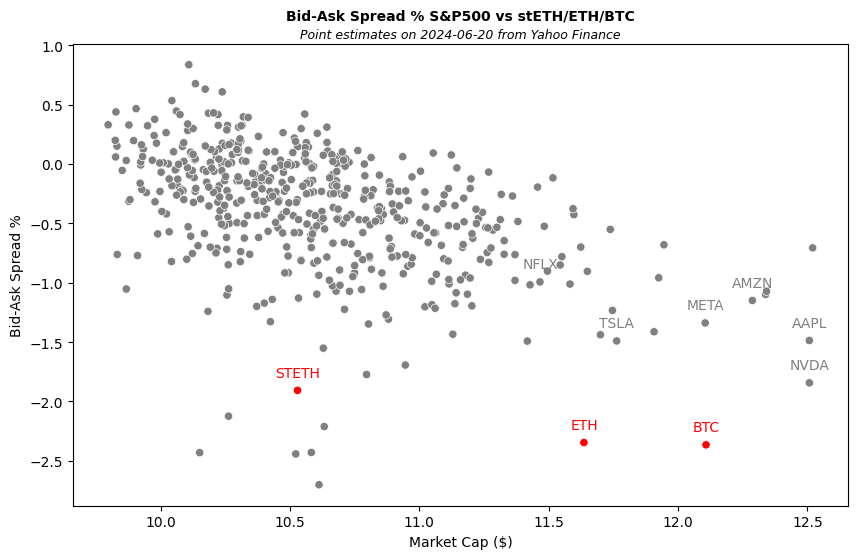

In [646]:
show_scatters(
    df,
    'log_market_cap',
    'log_spread_pct',
    'Bid-Ask Spread % S&P500 vs stETH/ETH/BTC'
)

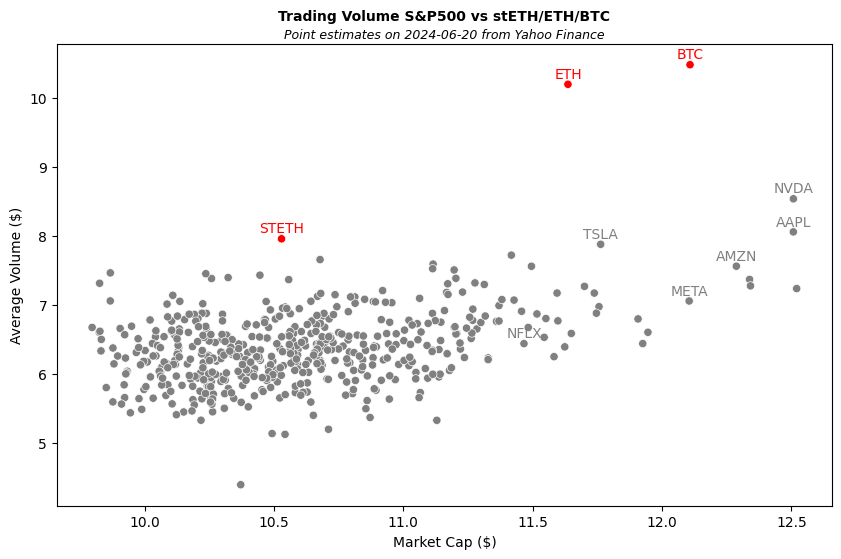

In [647]:
show_scatters(
    df,
    'log_market_cap',
    'log_avg_vol_10d',
    'Trading Volume S&P500 vs stETH/ETH/BTC')

In [648]:
df.nlargest(5, 'avg_vol_10d')

,stonk,bid_price,ask_price,avg_vol_10d,market_cap,spread,spread_pct,log_market_cap,log_spread_pct,log_avg_vol_10d,category
2,BTC,64874.60,64877.40,3.009913e+10,1.282394e+12,2.80,0.004316,12.108021,-2.364917,10.478554,Crypto
0,ETH,3547.32,3547.48,1.567604e+10,4.327391e+11,0.16,0.004510,11.636226,-2.345780,10.195236,Crypto
5,NVDA,139.34,139.36,3.435477e+08,3.216971e+12,0.02,0.014353,12.507447,-1.843046,8.535987,Big
4,AAPL,214.67,214.74,1.139380e+08,3.215250e+12,0.07,0.032608,12.507215,-1.486673,8.056669,Big
1,STETH,3547.32,3547.76,9.044900e+07,3.383208e+10,0.44,0.012404,10.529329,-1.906448,7.956404,Crypto
